In [1]:
import numpy as np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

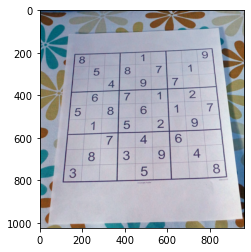

In [2]:
img = cv2.imread('Sudoku.jpeg')
#img = cv2.imread('Sudoku2.jpg')
#img = cv2.imread('Sudoku3.jpg')
plt.imshow(img)

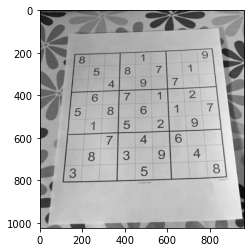

In [3]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grey, cmap = "gray")

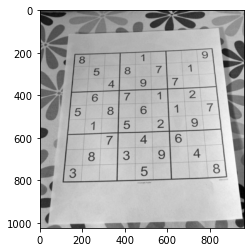

In [4]:
blur = cv2.GaussianBlur(grey, (3,3), cv2.BORDER_DEFAULT)
plt.imshow(blur, cmap = "gray")

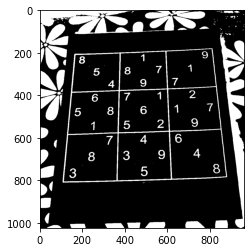

In [5]:
ret, thresh = cv2.threshold(blur,75, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU )
thresh = 255-thresh
plt.imshow(thresh, cmap = "gray")

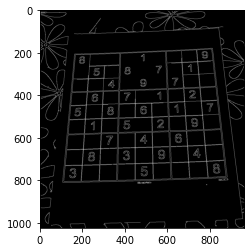

In [6]:
canny = cv2.Canny(grey, 50, 200)
plt.imshow(canny,cmap = "gray")

In [7]:
contours, hierarchies = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))
contours = sorted(contours, key=cv2.contourArea, reverse=True)
polygon = contours[0]
print(len(polygon))

67
2626


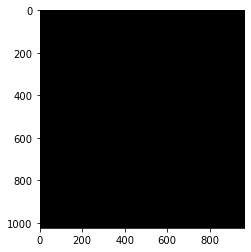

In [8]:
mask = np.zeros(img.shape[:2], dtype = "uint8")
plt.imshow(mask, cmap = "gray")

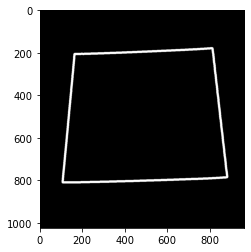

In [9]:
cv2.drawContours(mask, polygon, -1, (255,0,0), 10)
plt.imshow(mask, cmap = "gray")

112 803
872 780
167 212
804 185


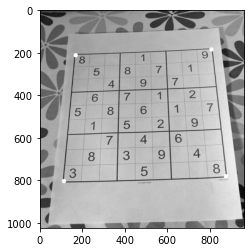

In [10]:
corners = cv2.goodFeaturesToTrack(mask, 4, 0.1, 250)
corners = np.int0(corners)
corner_values = []
if corners is not None:
    for i in corners:
        x,y = i.ravel()
        corner_values.append((x,y))
        print(x,y)
        cv2.circle(grey, (x,y), 10, 255, -1)

plt.imshow(grey, cmap = "gray")
        

In [11]:
def order_corners(corner_values):
    ordered = corner_values.copy()
    corner_values = corner_values
    min_sum = np.sum(np.max(corner_values, axis = 0))
    max_sum = 0
    for i in range(4):
        if sum(corner_values[i]) <= min_sum: 
            ordered[0] = corner_values[i]
            min_sum = sum(corner_values[i])

        elif sum(corner_values[i]) >= max_sum: 
            ordered[3] = corner_values[i]
            max_sum = sum(corner_values[i])

    for i in range(4):
        if False not in (corner_values[i] == ordered[0]) or False not in (corner_values[i] == ordered[3]): 
            continue

        k = corner_values[i] - ordered[0]
        if k[0] > k[1]:
            ordered[1] = corner_values[i]
        else:
            ordered[2] = corner_values[i]
    
    return ordered

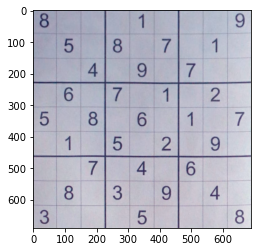

In [12]:
corner_values = order_corners(np.array(corner_values, np.float32))
dim = int(np.mean(np.max(corner_values, axis = 0) - np.min(corner_values, axis = 0))) + 1
dim_final = np.array([[0,0], [dim, 0], [0, dim], [dim, dim]], np.float32)
matrix = cv2.getPerspectiveTransform(corner_values, dim_final)
final = cv2.warpPerspective(img, matrix, grey.shape)[:int(dim), :int(dim)]

plt.imshow(final)